In [ ]:
print(sys.executable)

In [6]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as mtick
from matplotlib.cm import get_cmap
import addcopyfighandler

from IPython.core.display import HTML
from IPython.display import display

import model2 as mod
import model_fsolve as modf

import simu as sim

In [2]:
import fluids as fds

In [ ]:
debit = 120
deb = debit/3600
print(deb)

In [ ]:
debit_moyen = 210/165 # L/h
flow = debit_moyen/3600000 # m3/s
flow_lent = flow/10
rho = 997
nu = 0.896*1e-6
eta = rho*nu
d_riser = 0.005
Aire = math.pi*(d_riser/2)**2

Re = fds.core.Reynolds(flow/Aire,d_riser,rho,mu=eta)
print(Re)

In [ ]:
mdot = flow*1000 # kg/s (hypothse rho = 1000)
mdot_lent = flow_lent*1000
Cp = 4180
DT_moy = 2
Pth = mdot*Cp*DT_moy
DT_lent = Pth/(mdot_lent*Cp)
print(DT_lent)

In [3]:
par = {}

par["eps"] = 0.001

par["ref"] = 1

par["rho"] = 997 # kg/m3
par["nu"] = 0.896*1e-6 # at 25°C, in m2/s https://www4.ac-nancy-metz.fr/physique/ancien_site/Tp-phys/Term/TP-fluid/visco-eau.htm
par["eta"] = par["rho"]*par["nu"]

In [12]:
# Heat exchanger inputs --------------------------------------------------

# MICOE
# ------

par['N'] = 10

par['Lx'] = 5.886 # m, not used in the row calculation
par['Ly'] = (par['N']-1)*[1.2285/par['N']]

# Z-type or U-type

par['ref'] = 0

par['Dx'] = 0.008 # m, not used in the row calculation
par['Din'] = 0.042 # m
par['Dout'] = 0.042 # m

par['manifold'] = 'tubular' # or rectangular

coeff = 1.
par['coeff_Kxin'] = coeff
par['coeff_Kxout'] = coeff
par['coeff_Kyin'] = coeff
par['coeff_Kyout'] = coeff

# Parameters

par['theta'] = 90.

par['rough'] = 0.001 # aluminium = 0.001 mm

# End of inputs

# Manifold tubulaire ou rectangulaire

if par['manifold'] == 'tubular':
    par['Ax'] = math.pi*(par['Dx']/2)**2
    par['Ain'] = math.pi*(par['Din']/2)**2
    par['Aout'] = math.pi*(par['Dout']/2)**2
elif par['manifold'] == 'rectangular': # rectangulaire (SPRING ou autre)
    par['Ax'] = math.pi*(par['Dx']/2)**2
    par['Ain'] = par['h_man']*par['l_man']
    par['Aout'] = par['Ain']

par['a_x'] = 0.0000217
# par['a'] = 0.
par['b_x'] = 0.003162

# dP (Pa) = (rho/2) (a_x u**2 + b_x u) its the pressure loss function of a heat exchanger

par['sch'] = 'exchanger'

# 'Crane' or 'perso'
par['method'] = 'Crane'

# Listes de taille par['N']

par['Kxin'] = []
par['Kyin'] = []
par['Kxout'] = []
par['Kyout'] = []

In [ ]:
# Test d'un seul débit

par['QF'] = 100/3600000 # m3/s (0.000278 m3/s = 1000 L/h) (le premier nombre est en L/h)
# Speed and Reynolds at inlet manifold
par['U'] = par['QF']/par['Ain']
par['Reman'] = par['U']*(par['rho']*par['Din'])/par['eta']
tabl,res = modf.PL_fsolve(par,par['sch'],True)

In [13]:
# Création de la liste de plusieurs débits

list_Q_L = np.array([100,272,478,652,856,1094]) # L/h
list_Q_L = np.array([100,400,800,1200,1600,2000,2500,3000])
# list_Q_L = np.array([50,100,150])
list_Q = list_Q_L/3600000 # m3/s

print(list_Q)
print(list_Q_L)

[2.77777778e-05 1.11111111e-04 2.22222222e-04 3.33333333e-04
 4.44444444e-04 5.55555556e-04 6.94444444e-04 8.33333333e-04]
[ 100  400  800 1200 1600 2000 2500 3000]


In [14]:
# Test de plusieurs débits 
# Model fsolve -> résoud l'échangeur en harpe

list_PL,list_tabl,list_mn,list_std = sim.modf_parametric_flow_rates(par,list_Q)


2.777777777777778e-05
0.00011111111111111112
0.00022222222222222223
0.0003333333333333333
0.00044444444444444447
0.0005555555555555556
0.0006944444444444445
0.0008333333333333334


In [17]:
print(list_Q_L)

[ 100  400  800 1200 1600 2000 2500 3000]


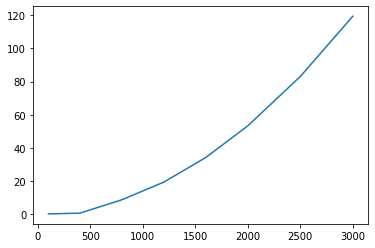

In [15]:
plt.plot(list_Q_L,np.array(list_PL)/1000)

In [ ]:
list_tabl[0]['qx']

In [ ]:
print(list_Q_L)

In [ ]:
# ancienne version 15 mm de large et 4,4 mm de hauteur 
# a = 0.00171969
# b = 0.123036

# nouvelle version 3 par 3 (mm)
# a = 0.00337677
# b = 1.41816

a = 9.7*1E-7*1000
b = 0.001472*1000

# a = 0.0427594
# b = 20.81999

SW = [421.66,801.75,1159.49,1641.60,2205.57]

sim.plot_PL_harp(par,list_Q_L,list_PL,a,b,SW,5)

axes = plt.gca()
axes.set_xlim(0,1400)
plt.show()
#sim.plot_PL_harp(par,list_Q_L,list_PL,a,b,5)
# sim.plot_abs_flow_rates_harp(par,list_Q_L,list_tabl,list_mn)
sim.plot_flow_rates_harp(par,list_Q_L,list_PL,list_tabl,list_mn)

In [8]:
PL_measured = (a*list_Q_L**2 + b*list_Q_L)

plt.scatter(list_Q_L,PL_measured,label='SW Flow Simulation')

for i in range(len(save)):
    plt.plot(np.array(list_Q_L),np.array(save[i][0]),label=str(test_list[i]))

plt.legend()
plt.xlabel('Q (L/h)')
plt.ylabel('PL (Pa)')
plt.grid()
plt.show()

NameError: name 'a' is not defined

In [ ]:
PL_measured = (a*list_Q_L**2 + b*list_Q_L)
RMSE1 = math.sqrt(mean_squared_error(list_PL,PL_measured))
RMSE2 = math.sqrt(mean_squared_error(SW,PL_measured))
moyenne = np.mean(PL_measured)
print(moyenne)
print(round(RMSE1/moyenne,2),round(RMSE2/moyenne,2))


rel_err1 = np.round((np.array(list_PL)-np.array(PL_measured))/np.array(PL_measured),2)
rel_err2 = np.round((np.array(SW)-np.array(PL_measured))/np.array(PL_measured),2)

print(rel_err1)
print(rel_err2)

In [ ]:
sim.repartition_PL(par,list_PL,list_tabl,list_Q)
sim.plt_repartition_PL(par,list_Q_L,list_PL,list_tabl,120,'ok')

In [ ]:
# Calcul coefficient total

deb = list_Q[8]
Cfi = modf.Kxin(par,deb/2,deb/24,2)
Cfe = modf.Kxout(par,deb/2,deb/24,2)

Rex_i = fds.core.Reynolds(deb/par['Ax'],par['Dx'],par['rho'],mu=par['eta'])
fx_i = fds.friction.friction_factor(Re = Rex_i)
ax_i = fx_i*(par['Lx']/par['Dx'])

print(1+Cfi+Cfe+ax_i)
print(par['Ly']*24)
print((par['Ly']*24)/par['Din'])

In [ ]:
# Test pertes de charge régulières

deb = list_Q[0]
Cfi = modf.Kxin(par,deb/2,deb/24,2)
Cfe = modf.Kxout(par,deb/2,deb/24,2)

Ax = (0.010*0.015)

Rex_i = fds.core.Reynolds(deb/Ax,par['Dx'],par['rho'],mu=par['eta'])
fx_i = fds.friction.friction_factor(Re = Rex_i)
ax_i = fx_i*(par['Lx']/par['Dx'])

print(1+Cfi+Cfe+ax_i)
print(par['Ly']*24)
print((par['Ly']*24)/par['Din'])

In [ ]:
# Inputs for singular pressure losses

d_epdm = 0.015
d_red = 0.0078 # 0.011 en pratique, diminué à 0.0078 pour que les PL + 2m EPDM fit aux mesures exp Technoptic avec SSA
d_man = 0.0081 # 13 mm de base, quand le manifold ne fait plus que 5 mm de hauteur c'est 8,1 mm de diamètre hydraulique

L_epdm = 2.

angle_bm_epdm = 90.
angle_bm_man = 90.

In [ ]:
PL_tot,PL_tot_lin,exp_PL_tot,cont_diff,bends,harp,reg = sim.sing_PL(par,d_epdm,d_red,d_man,L_epdm,angle_bm_epdm,angle_bm_man,list_Q_L,list_PL)

In [ ]:
# Singular losses in fittings - Stacked bars chart

labels = ['10', '50', '100', '150', '200']

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, cont_diff, width, label='Sharp contractions and diffusers')
ax.bar(labels, bends, width, bottom=cont_diff,label='Bends (x4)')
ax.bar(labels, harp, width, bottom=cont_diff+bends,label='Harp exchanger')
ax.bar(labels, reg, width, bottom=cont_diff+bends+harp,label='Linear PL')

ax.set_ylabel('PL (Pa)')
ax.set_title('SPRING')
ax.legend()

plt.show()

In [ ]:
save = [PL_tot,PL_tot_lin,exp_PL_tot,cont_diff,bends,harp,reg]

In [ ]:
save2 = [PL_tot,PL_tot_lin,exp_PL_tot,cont_diff,bends,harp,reg]

In [ ]:
ratio = (PL_tot_lin-save[1])/save[1]

plt.plot(list_Q_L,ratio)
plt.xlabel('Q (L/h)')
plt.ylabel('PL increase')
plt.title('SPRING h5 mm PL increase in % of SPRING h10 mm PL')
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) 
plt.grid()
plt.show()

In [ ]:
plt.plot(list_Q_L,PL_tot,label='Total pressure losses')

plt.legend()
plt.xlabel('Q (L/h)')
plt.ylabel('Re')

plt.grid()

In [ ]:
print(list_Q_L)
print(list_PL)
print(list_mn)
print([list_Q_L[i]/par["N"] for i in range(len(list_Q_L))])

# df_res = pd.DataFrame([np.array(list_Q_L),np.array(list_PL)],columns = ['Q_L','PL (Pa)'])
# display(HTML(df_res.to_html()))  


In [ ]:
# Répartition des débits par canal (en valeur absolue)

list_Q_L_round = [round(num, 0) for num in list_Q_L]
risers = np.linspace(0,164,165)

for i in range(len(list_tabl)):
    plt.plot(risers,np.array(list_tabl[i]['qx']),label=str(list_Q_L_round[i])+' L/h')
    plt.legend()

plt.xlabel('N° riser')
plt.ylabel('qx (L/h)')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

plt.show()

In [ ]:
# Répartition des débits par canal (en valeur relative au débit moyen attendu)

for i in range(len(list_tabl)):
    plt.plot(risers,np.array(list_tabl[i]['qx'])/list_mn[i],label=str(list_Q_L_round[i])+' L/h')
    plt.legend()

plt.xlabel('N° riser')
plt.ylabel('qx (L/h)')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

plt.show()

In [ ]:
# Test paramétrique sur  la heuteur de canal

print(list_PL)
print(list_tabl[0])

print(par['N'])
# param_name = 'l_riser'
# test_list = par['EP']*np.array([2,6,12,18,24])
param_name = 'h_riser'
test_list = [0.001,0.002,0.003,0.004]
save = []

for i in range(len(test_list)):
    sim.preproc(par,param_name,test_list[i])
    list_PL,list_tabl,list_mn,list_std = sim.modf_parametric_flow_rates(par,list_Q)
    save.append([list_PL,list_tabl,list_mn,list_std])

# Plot pressure losses

h_riser_tests = ['3 mm','4.4 mm','6 mm']
colors = ['orange','green','red']

for i in range(len(h_riser_tests)):
    plt.plot(np.array(list_Q_L),np.array(save_h_riser[i+1][0]),label=h_riser_tests[i],color=colors[i])

plt.xlabel('Q (L/h)')
plt.ylabel('PL (Pa)')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.legend()

plt.show()


In [ ]:
# Plot pressure losses

plt.plot(np.array(list_Q_L),np.array(list_PL))

plt.xlabel('Q (L/h)')
plt.ylabel('PL (Pa)')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

plt.show()
print([list_Q_L[i]/par['N'] for i in range(len(list_Q_L))])

In [ ]:
# Plot mean and standard deviation of flow rate

plt.plot(np.array(list_Q_L),np.array(list_mn))
plt.plot(np.array(list_Q_L),np.array(list_std))

plt.xlabel('Q (L/h)')
plt.ylabel('Flow rate (L/h)')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

plt.show()

In [ ]:
# Plot standard deviation of flow rate / mean flow rate

plt.plot(np.array(list_Q_L),np.array(list_std)/np.array(list_mn))

plt.xlabel('Q (L/h)')
plt.ylabel('Ratio of flow rate standard deviation out of mean flow rate')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

plt.show()

In [ ]:
print(np.array(list_std))
print(np.array(list_mn))
print(np.array(list_std)/np.array(list_mn))

In [ ]:
np.array(list_tabl[0]['qx'])

In [ ]:
risers = np.linspace(0,165,166)

In [ ]:
len(np.array(list_tabl[i]['qx']))

In [ ]:
len(risers)

In [ ]:
print(list_Q_L)

In [ ]:
[round(num, 0) for num in list_Q_L]